# TP1 - HMLA408: Joseph Salmon

## Question: Python version

In [1]:
from platform import python_version
print(python_version())

3.6.8


In [2]:
python_version()

'3.6.8'

## Question: pwd

In [3]:
pwd  # print working directory / Affiche repertoire courant

'/home/jo/Documents/Mes_cours/Montpellier/HLMA408/TPs/TP-Introduction/code'

## Question: exécuter une fonction Python

In [4]:
run test.py  # need the file to exist...in the correct place indicated by the previous line

3.6.8


## Question: Download

In [5]:
# Download
import os
from download import download
import pandas as pd
url = "http://josephsalmon.eu/enseignement/datasets/babies23.data"
df_name = "babies23.data"
path_target = os.path.join("./", df_name)
download(url, path_target, replace=False)
df_babies = pd.read_csv("babies23.data", skiprows=38, sep='\s+') # \s+ : for hanlding spaces

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


## Question: Utilisation de l'aide

In [6]:
download?

## Question: listez les fichiers localement

In [7]:
ls  # listing local files in the working directory

babies23.data  tp1_hmla408_joseph_salmon.ipynb  violons.pdf
test.py        TP1-Squelette.ipynb


## Question: nom des colonnes et duplications

In [8]:
df_babies.columns

Index(['id', 'pluralty', 'outcome', 'date', 'gestation', 'sex', 'wt', 'parity',
       'race', 'age', 'ed', 'ht', 'wt.1', 'drace', 'dage', 'ded', 'dht', 'dwt',
       'marital', 'inc', 'smoke', 'time', 'number'],
      dtype='object')

## Question: afficher le début du data frame

In [9]:
df_babies.head()

,id,pluralty,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
0,15,5,1,1411,284,1,120,1,8,27,...,8,31,5,65,110,1,1,0,0,0
1,20,5,1,1499,282,1,113,2,0,33,...,0,38,5,70,148,1,4,0,0,0
2,58,5,1,1576,279,1,128,1,0,28,...,5,32,1,99,999,1,2,1,1,1
3,61,5,1,1504,999,1,123,2,0,36,...,3,43,4,68,197,1,8,3,5,5
4,72,5,1,1425,282,1,108,1,0,23,...,0,24,5,99,999,1,1,1,1,5


## Question : extraire la colonne 'wt'

In [10]:
df_babies['wt']

0       120
1       113
2       128
3       123
4       108
5       136
6       138
7       132
8       120
9       143
10      140
11      144
12      141
13      110
14      114
15      115
16       92
17      115
18      144
19      119
20      105
21      115
22      137
23      122
24      131
25      103
26      146
27      114
28      125
29      114
       ... 
1206    127
1207     87
1208    141
1209    144
1210    116
1211     75
1212    138
1213     99
1214    118
1215    152
1216     97
1217    146
1218     81
1219    110
1220    135
1221    114
1222    124
1223    115
1224    143
1225    113
1226    109
1227    103
1228    118
1229    127
1230    132
1231    113
1232    128
1233    130
1234    125
1235    117
Name: wt, Length: 1236, dtype: int64

## Question : extraction de ligne(s)

In [11]:
df_babies.iloc[2]

id             58
pluralty        5
outcome         1
date         1576
gestation     279
sex             1
wt            128
parity          1
race            0
age            28
ed              2
ht             64
wt.1          115
drace           5
dage           32
ded             1
dht            99
dwt           999
marital         1
inc             2
smoke           1
time            1
number          1
Name: 2, dtype: int64

In [12]:
df_babies.iloc[:8]

,id,pluralty,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
0,15,5,1,1411,284,1,120,1,8,27,...,8,31,5,65,110,1,1,0,0,0
1,20,5,1,1499,282,1,113,2,0,33,...,0,38,5,70,148,1,4,0,0,0
2,58,5,1,1576,279,1,128,1,0,28,...,5,32,1,99,999,1,2,1,1,1
3,61,5,1,1504,999,1,123,2,0,36,...,3,43,4,68,197,1,8,3,5,5
4,72,5,1,1425,282,1,108,1,0,23,...,0,24,5,99,999,1,1,1,1,5
5,100,5,1,1673,286,1,136,4,0,25,...,3,28,2,64,130,1,4,2,2,2
6,102,5,1,1449,244,1,138,4,7,33,...,7,37,4,99,999,1,98,0,0,0
7,129,5,1,1562,245,1,132,2,7,23,...,7,23,4,71,192,1,2,0,0,0


In [13]:
df_babies.iloc[-5:]

,id,pluralty,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
1231,9153,5,1,1672,275,1,113,0,0,27,...,0,32,4,72,190,1,4,0,0,0
1232,9163,5,1,1712,265,1,128,1,0,24,...,0,24,5,73,170,1,3,0,0,0
1233,9213,5,1,1672,291,1,130,4,1,30,...,2,30,5,70,180,1,3,1,1,2
1234,9229,5,1,1680,281,1,125,0,0,21,...,0,27,5,71,165,1,1,0,0,0
1235,9263,5,1,1668,297,1,117,4,0,38,...,4,34,1,68,172,1,6,0,0,0


In [14]:
df_babies.iloc[100:111]

,id,pluralty,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
100,1552,5,1,1419,279,1,120,2,0,27,...,0,27,2,99,999,1,2,1,1,5
101,1569,5,1,1681,274,1,119,3,0,33,...,0,36,5,74,155,1,9,0,0,0
102,1572,5,1,1406,286,1,116,1,6,24,...,6,27,0,66,185,1,1,0,0,0
103,1594,5,1,1350,280,1,107,4,7,36,...,7,36,1,99,999,1,5,1,1,2
104,1596,5,1,1539,273,1,119,1,0,24,...,4,26,1,99,999,1,7,1,1,3
105,1603,5,1,1601,279,1,133,5,2,37,...,3,40,5,99,999,1,6,2,2,2
106,1617,5,1,1572,287,1,155,2,0,33,...,3,38,3,70,180,1,3,0,0,0
107,1667,5,1,1679,273,1,126,2,0,22,...,0,25,4,99,999,1,7,0,0,0
108,1683,5,1,1367,303,1,129,1,0,27,...,0,32,5,99,999,1,7,0,0,0
109,1685,5,1,1505,274,1,137,4,7,29,...,7,46,4,99,999,1,3,0,0,0


## Question: recoder les valeurs manquantes par des nan

In [15]:
import numpy as np
df_babies['ht'].replace(99, np.nan, inplace=True)
df_babies['dht'].replace(99, np.nan, inplace=True)

In [16]:
# utile dans le notebook pour éviter de refaire le traitement plusieurs fois, ce qui serait catastrophique ...
is_preprocessing_done = False

In [17]:
if is_preprocessing_done is False:
    df_babies['ht'] = df_babies['ht'] * 2.54
    df_babies['dht'] = df_babies['dht'] * 2.54
    is_preprocessing_done = True

## Question: enlever les nan

In [18]:
df_babies.dropna(inplace=True) # les nan sont alors reconnus et peuvent être enlevés.

In [19]:
df_babies['ht']

0       157.48
1       162.56
3       175.26
5       157.48
7       165.10
8       157.48
11      162.56
15      160.02
17      152.40
19      167.64
21      170.18
22      167.64
23      172.72
26      147.32
28      165.10
29      167.64
31      154.94
32      167.64
33      152.40
35      170.18
36      160.02
37      160.02
38      165.10
40      154.94
43      154.94
44      165.10
46      167.64
47      152.40
48      167.64
49      160.02
         ...  
1202    147.32
1203    160.02
1204    154.94
1205    162.56
1206    154.94
1207    167.64
1208    137.16
1209    167.64
1210    167.64
1211    165.10
1212    172.72
1213    175.26
1214    160.02
1216    157.48
1217    167.64
1218    160.02
1219    167.64
1220    152.40
1221    165.10
1222    162.56
1223    162.56
1226    160.02
1227    152.40
1229    165.10
1230    165.10
1231    152.40
1232    170.18
1233    165.10
1234    165.10
1235    165.10
Name: ht, Length: 732, dtype: float64

## Question: exraire seulement les informations concernant la taille

In [20]:
df_babies = df_babies[['ht','dht']]

## Question: description / résumé élémentaires:

In [21]:
df_babies.describe()

,ht,dht
count,732.000000,732.000000
mean,162.709208,178.376011
std,6.476419,7.353196
min,137.160000,152.400000
25%,157.480000,172.720000
50%,162.560000,180.340000
75%,167.640000,182.880000
max,182.880000,198.120000


In [22]:
df_babies['ht'].mean()

162.70920765027327

In [23]:
df_babies['ht'].std()

6.476418503721386

In [24]:
df_babies['ht'].median()

162.56

In [25]:
df_babies['ht'].quantile(0.99)

177.8

In [26]:
df_babies['ht'].quantile([0.01,0.05,0.1,0.9, 0.95, 0.99])

0.01    148.1074
0.05    152.4000
0.10    154.9400
0.90    170.1800
0.95    172.7200
0.99    177.8000
Name: ht, dtype: float64

## Question: Graphique et visualisation

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5,1,'Estimation de la densité de la taille des mères')

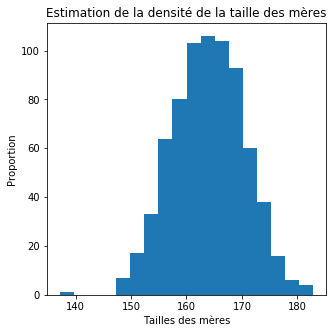

In [28]:
plt.figure(figsize=(5,5))
ax = plt.hist(df_babies['ht'], bins=18)
plt.xlabel('Tailles des mères')
plt.ylabel('Proportion')
plt.title("Estimation de la densité de la taille des mères") 

/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Estimation de la densité de la taille des mères')

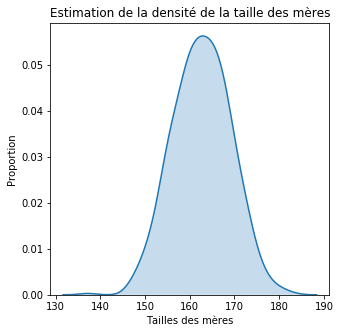

In [29]:
plt.figure(figsize=(5,5))
ax = sns.kdeplot(df_babies['ht'], shade=True)
plt.xlabel('Tailles des mères')
plt.ylabel('Proportion')
ax.legend().set_visible(False)
plt.title("Estimation de la densité de la taille des mères")

## Question: boxplot

Text(0,0.5,'cm')

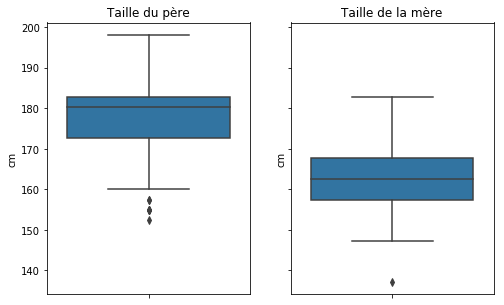

In [30]:
nrow, ncol = (1,2)
fig, axs = plt.subplots(nrow, ncol,figsize=(8, 5),sharey=True)

sns.boxplot(x='dht',ax=axs[0], data=df_babies, orient='vertical')
axs[0].set_title("Taille du père")
axs[0].set_ylabel("cm")

sns.boxplot(x='ht',ax=axs[1], data=df_babies, orient='vertical')
axs[1].set_title("Taille de la mère")
axs[1].set_ylabel("cm")


## Question: Violins

/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


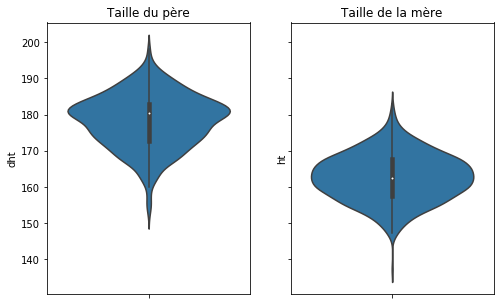

In [31]:
nrow, ncol = (1,2)
fig, axs = plt.subplots(nrow, ncol,figsize=(8, 5),sharey=True)

sns.violinplot(x='dht', ax=axs[0], data=df_babies, orient='vertical')
axs[0].set_title("Taille du père")

sns.violinplot(x='ht',ax=axs[1], data=df_babies, orient='vertical')
axs[1].set_title("Taille de la mère")
fig.savefig("violons.pdf")

## Question: Scatter plot

Text(0.5,1,'Taille des pères en fonction de la taille des mères')

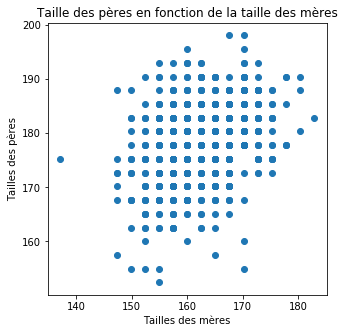

In [32]:
plt.figure(figsize=(5,5))
ax = plt.scatter(df_babies['ht'],df_babies['dht'])
plt.xlabel('Tailles des mères')
plt.ylabel('Tailles des pères')
plt.title("Taille des pères en fonction de la taille des mères")